In [22]:
from IPython.display import HTML, display
css_file_path = "../../design/custom.css"
styles = "<link rel='stylesheet' href='%s'>" % css_file_path
display(HTML(styles))

# 2.2 $\quad$ Análisis del efecto de la diversificación en el riesgo de una cartera

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
#import cvxpy as cp
import plotly.graph_objects as go
from tqdm import tqdm


plt.style.use('ggplot')


## 1. Efecto de la diversificación en el riesgo de una cartera

Hemos visto que la varianza de una cartera de dos activos viene definida por:

$$\sigma^2_p= \underset{\text{Activo 1}} {\underbrace{w_1^2\sigma^2_1}}+\underset{\text{Activo 2}} {\underbrace{w_2^2\sigma^2_2}}+ \underset{\text{Relación entre activos}} {\underbrace{2w_1w_2 \sigma_{12}}}$$
       


Podemos generalizar para una cartera con $n$ activos:

$$\sigma^2_p = \underset{\text{Riesgo Activos}} {\underbrace{\sum_{i=1}^n w_i^2 \sigma_i^2}} + \underset{\text{Relación entre activos}} {\underbrace{ \sum_{i=1}^n \sum_{j=1}^n w_i w_j \sigma_{ij}}} \quad \forall i \neq j$$




Si hacemos una cartera en la que invertimos la misma cantidad en cada activo $\Rightarrow w_i = \dfrac{1}{n}$, la varianza de la cartera se puede escribir como:

$$\sigma_p^2= \dfrac{1}{n^2}\sum_{i=1}^{n} \sigma _i^2 + \dfrac{1}{n^2}\sum_{i=1}^{n}\sum_{j=1}^{n}\sigma_{ij} \quad \forall i \neq j$$

Llamando:

* Varianza media de los activos 

$$\bar{V} = \dfrac{1}{n}\sum_{i=1}^{n} \sigma _i^2 \quad \Rightarrow \quad \sum_{i=1}^{n} \sigma _i^2 = n \bar{V}$$

* Covarianza media entre activos 

$$\bar{\sigma_{ij}} = \dfrac{1}{n(n-1)}\sum_{i=1}^{n}\sum_{j=1}^{n}\sigma_{ij} \quad \Rightarrow \quad  \sum_{i=1}^{n}\sum_{j=1}^{n}\sigma_{ij} = n(n-1)\bar{\sigma_{ij}}$$

Sustituyendo en la ecuación de la varianza de una cartera equiponderada:

$$\sigma_p^2= \dfrac{1}{n^2}n \bar{V} + \dfrac{1}{n^2}n(n-1)\bar{\sigma_{ij}} = \dfrac{1}{n}\bar{V} + \left( 1 - \frac{1}{n}\right) \bar{\sigma_{ij}}$$

Si el número de activos $n$ tiende a infinito:

$$\lim_{n \to \infty} \sigma_p^2 =  \bar{\sigma_{ij}} $$

**Nos queda el riesgo sistémico o de mercado que no se puede eliminar con la diversificación**.

El riesgo sistémico es el riesgo que afecta a todos los activos de una cartera.

<center>
    <img src="../imgs/tipos_de_riesgos.PNG"  alt="drawing" width="400">
</center>

## 2. Datos reales con S&P500

## EJERCICIO DE ANÁLISIS DEL EFECTO DE LA DIVERSIFICACIÓN:



**Objetivo:** El objetivo de este ejercicio es analizar cómo la volatilidad de una cartera de inversión varía a medida que se añaden diferentes activos a la misma

**Instrucciones:**

* **Descarga de Datos:**
Utiliza la lista de tickers tickers proporcionada para descargar los precios diarios de cierre ajustados de cada activo. Considera un rango de fechas específico para tu análisis.

* **Limpieza de Datos:**
Asegúrate de que todos los datos estén limpios y alineados por fecha. Elimina cualquier dato faltante.

* **Construcción de las Carteras:**
Inicia tu análisis con una cartera compuesta únicamente por los dos primeros activos de tu lista de tickers. Para estos dos activos, asigna pesos equiponderados y calcula la volatilidad de la cartera.
Posteriormente, diversifica gradualmente la cartera añadiendo un activo más de la lista en cada paso y calcula la volatilidad de cada cartera equiponderada.

* **Visualización:**

Crea un gráfico que muestre cómo la volatilidad de la cartera cambia a medida que se añaden más activos. El eje x debe representar el número de activos en la cartera, mientras que el eje y debe mostrar la volatilidad anualizada de la cartera.

In [3]:
tickers = ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM',
        'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE',
        'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BG', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR',
        'BLK', 'BMY', 'BR', 'BRO', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT','CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CDW', 'CE', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR',
        'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CSCO', 'CSGP',
        'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DLR', 'DLTR', 'DOV', 'DPZ', 'DRI', 'DTE',
        'DUK', 'DVA', 'DVN', 'DXC', 'DXCM', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EG', 'EIX', 'EL', 'ELV', 'EMN', 'EMR', 'ENPH', 'EOG', 'EPAM', 'EQIX', 'EQR', 'EQT', 'ES', 'ESS',
        'ETN', 'ETR', 'ETSY', 'EVRG', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FANG', 'FAST', 'FCX', 'FDS', 'FDX', 'FE', 'FFIV', 'FI', 'FICO', 'FIS', 'FITB', 'FLT', 'FMC',
        'FRT', 'FSLR', 'FTNT', 'GD', 'GE', 'GEN', 'GILD', 'GIS', 'GL', 'GLW', 'GM', 'GNRC', 'GOOG', 'GOOGL', 'GPC', 'GPN', 'GRMN', 'GS', 'GWW', 'HAL', 'HAS', 'HBAN', 'HCA', 'HD',
        'HES', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HPQ', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IDXX', 'IEX', 'IFF', 'ILMN', 'INCY', 'INTC', 'INTU', 'IP', 'IPG', 
        'IQV', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'J', 'JBHT', 'JCI', 'JKHY', 'JNJ', 'JNPR', 'JPM', 'K', 'KDP', 'KEY', 'KEYS', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO',
        'KR', 'L', 'LDOS', 'LEN', 'LH', 'LHX', 'LIN', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUV', 'LVS', 'LYB', 'LYV', 'MA', 'MAA', 'MAR', 'MAS', 'MCD', 'MCHP',
        'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'META', 'MGM', 'MHK', 'MKC', 'MKTX', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MOH', 'MOS', 'MPC', 'MPWR', 'MRK', 'MRO', 'MS', 'MSCI',
        'MSFT', 'MSI', 'MTB', 'MTCH', 'MTD', 'MU', 'NCLH', 'NDAQ', 'NDSN', 'NEE', 'NEM', 'NFLX', 'NI', 'NKE', 'NOC', 'NOW', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NVR',
        'NWL', 'NWS', 'NWSA', 'NXPI', 'O', 'ODFL', 'OKE', 'OMC', 'ON', 'ORCL', 'ORLY', 'OXY', 'PANW', 'PARA', 'PAYC', 'PAYX', 'PCAR', 'PCG', 'PEAK', 'PEG', 'PEP', 'PFE', 'PFG',
        'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PODD', 'POOL', 'PPG', 'PPL', 'PRU', 'PSA', 'PSX', 'PTC', 'PWR', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL',
        'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROL', 'ROP', 'ROST', 'RSG', 'RTX', 'RVTY', 'SBAC', 'SBUX', 'SCHW', 'SEDG', 'SEE', 'SHW', 'SJM', 'SLB', 'SNA',
        'SNPS', 'SO', 'SPG', 'SPGI', 'SRE', 'STE', 'STLD', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TDY', 'TECH', 'TEL', 'TER', 'TFC', 'TFX',
        'TGT', 'TJX', 'TMO', 'TMUS', 'TPR', 'TRGP', 'TRMB', 'TROW', 'TRV', 'TSCO', 'TSLA', 'TSN', 'TT', 'TTWO', 'TXN', 'TXT', 'TYL', 'UAL', 'UDR', 'UHS', 'ULTA', 'UNH', 'UNP', 
        'UPS', 'URI', 'USB', 'V', 'VFC', 'VLO', 'VMC', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VTRS', 'VZ', 'WAB', 'WAT', 'WBA', 'WBD', 'WDC', 'WEC', 'WELL', 'WFC', 'WHR', 'WM', 'WMB',
        'WMT', 'WRB', 'WRK', 'WST', 'WTW', 'WY', 'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS']

In [4]:
## TO-DO
precios = yf.download(tickers, start = '2019-01-01')['Adj Close']
precios.head()

c:\Users\nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]c:\Users\nacho\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\nacho\AppData\Local\Programs\Python\Pytho

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,63.381702,31.963156,145.042282,37.845043,69.977959,NaN,63.600929,26.190001,130.600540,224.570007,...,99.234459,41.850044,53.465618,35.926991,62.386475,83.159996,95.619499,156.240005,34.859070,81.475189
2019-01-03,61.046738,29.581665,149.570312,34.075397,67.672279,NaN,60.599331,25.780001,126.141624,215.699997,...,98.274437,41.685146,52.644726,35.945942,60.247826,81.068245,93.889969,146.880005,34.666241,78.659050
2019-01-04,63.159798,31.530159,145.859711,35.530048,69.852478,NaN,62.328892,26.389999,131.046448,226.190002,...,102.238113,42.093052,54.585724,36.988960,62.789829,83.178177,97.096611,152.970001,35.730968,81.745232
2019-01-07,64.500961,32.425678,147.999710,35.450970,70.871971,NaN,63.262318,26.330000,131.501633,229.259995,...,104.053619,41.910801,54.869576,37.652695,61.861183,83.087227,97.134033,155.289993,35.873482,82.237068
2019-01-08,65.446495,31.904110,146.971085,36.126766,71.201363,NaN,62.502781,26.430000,134.827255,232.679993,...,107.313911,42.396820,55.268520,37.396683,62.442738,82.923523,94.955727,156.330002,36.200447,83.461922


In [6]:
precios = precios.dropna(axis= 1, how = 'all') #primero un dropna por columnas
precios 


Ticker,A,AAL,AAP,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,63.381702,31.963156,145.042282,37.845043,69.977959,63.600929,26.190001,130.600540,224.570007,77.771782,...,99.234459,41.850044,53.465618,35.926991,62.386475,83.159996,95.619499,156.240005,34.859070,81.475189
2019-01-03,61.046738,29.581665,149.570312,34.075397,67.672279,60.599331,25.780001,126.141624,215.699997,73.073982,...,98.274437,41.685146,52.644726,35.945942,60.247826,81.068245,93.889969,146.880005,34.666241,78.659050
2019-01-04,63.159798,31.530159,145.859711,35.530048,69.852478,62.328892,26.389999,131.046448,226.190002,74.848122,...,102.238113,42.093052,54.585724,36.988960,62.789829,83.178177,97.096611,152.970001,35.730968,81.745232
2019-01-07,64.500961,32.425678,147.999710,35.450970,70.871971,63.262318,26.330000,131.501633,229.259995,75.318794,...,104.053619,41.910801,54.869576,37.652695,61.861183,83.087227,97.134033,155.289993,35.873482,82.237068
2019-01-08,65.446495,31.904110,146.971085,36.126766,71.201363,62.502781,26.430000,134.827255,232.679993,77.156265,...,107.313911,42.396820,55.268520,37.396683,62.442738,82.923523,94.955727,156.330002,36.200447,83.461922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-07,149.309998,14.900000,73.680000,169.000000,180.570007,120.919998,87.690002,386.910004,556.039978,198.240005,...,101.110001,50.040001,107.370003,33.419998,126.970001,140.380005,127.360001,288.589996,41.520000,181.509995
2024-03-08,147.869995,14.680000,73.080002,170.729996,178.850006,120.959999,87.610001,378.170013,551.690002,195.940002,...,100.430000,51.020000,108.379997,33.750000,127.080002,139.559998,126.739998,282.589996,42.240002,182.160004
2024-03-11,147.289993,14.650000,75.769997,172.750000,179.630005,120.190002,90.309998,373.220001,560.419983,198.210007,...,103.230003,52.910000,109.019997,33.869999,126.180000,140.080002,128.039993,280.230011,41.610001,183.490005


In [8]:
precios = precios.dropna(axis = 0) # un dropna por filas, por defecto es axis = 0, osea que no haria falta poner el axis = 0
precios

Ticker,A,AAL,AAP,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,63.381702,31.963156,145.042282,37.845043,69.977959,63.600929,26.190001,130.600540,224.570007,77.771782,...,99.234459,41.850044,53.465618,35.926991,62.386475,83.159996,95.619499,156.240005,34.859070,81.475189
2019-01-03,61.046738,29.581665,149.570312,34.075397,67.672279,60.599331,25.780001,126.141624,215.699997,73.073982,...,98.274437,41.685146,52.644726,35.945942,60.247826,81.068245,93.889969,146.880005,34.666241,78.659050
2019-01-04,63.159798,31.530159,145.859711,35.530048,69.852478,62.328892,26.389999,131.046448,226.190002,74.848122,...,102.238113,42.093052,54.585724,36.988960,62.789829,83.178177,97.096611,152.970001,35.730968,81.745232
2019-01-07,64.500961,32.425678,147.999710,35.450970,70.871971,63.262318,26.330000,131.501633,229.259995,75.318794,...,104.053619,41.910801,54.869576,37.652695,61.861183,83.087227,97.134033,155.289993,35.873482,82.237068
2019-01-08,65.446495,31.904110,146.971085,36.126766,71.201363,62.502781,26.430000,134.827255,232.679993,77.156265,...,107.313911,42.396820,55.268520,37.396683,62.442738,82.923523,94.955727,156.330002,36.200447,83.461922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-06,146.220001,14.880000,71.900002,169.119995,181.059998,119.339996,88.820000,380.829987,543.090027,191.699997,...,99.139999,48.439999,106.769997,33.410000,126.349998,139.550003,125.830002,287.269989,41.299999,183.529999
2024-03-07,149.309998,14.900000,73.680000,169.000000,180.570007,120.919998,87.690002,386.910004,556.039978,198.240005,...,101.110001,50.040001,107.370003,33.419998,126.970001,140.380005,127.360001,288.589996,41.520000,181.509995
2024-03-08,147.869995,14.680000,73.080002,170.729996,178.850006,120.959999,87.610001,378.170013,551.690002,195.940002,...,100.430000,51.020000,108.379997,33.750000,127.080002,139.559998,126.739998,282.589996,42.240002,182.160004


In [11]:

retornos = np.log(precios).diff().dropna()
retornos.head()


Ticker,A,AAL,AAP,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.037535,-0.077429,0.030741,-0.104924,-0.033504,-0.048344,-0.015779,-0.034738,-0.040299,-0.062306,...,-0.009721,-0.003948,-0.015473,0.000527,-0.034882,-0.025475,-0.018253,-0.061777,-0.005547,-0.035176
2019-01-04,0.034028,0.063790,-0.025121,0.041803,0.031709,0.028141,0.023386,0.038147,0.047487,0.023989,...,0.039541,0.009738,0.036206,0.028603,0.041327,0.025694,0.033583,0.040626,0.030251,0.038485
2019-01-07,0.021012,0.028006,0.014565,-0.002228,0.014489,0.014865,-0.002276,0.003467,0.013481,0.006269,...,0.017602,-0.004339,0.005187,0.017785,-0.014900,-0.001094,0.000385,0.015052,0.003981,0.005999
2019-01-08,0.014553,-0.016216,-0.006974,0.018883,0.004637,-0.012079,0.003791,0.024975,0.014807,0.024103,...,0.030852,0.011530,0.007244,-0.006823,0.009357,-0.001972,-0.022681,0.006675,0.009073,0.014784
2019-01-09,0.020719,0.030379,0.027186,0.016839,-0.033374,0.016553,0.012782,0.005017,0.011750,0.025025,...,0.012936,-0.008016,0.005261,0.005311,0.016094,-0.000439,0.008139,0.024516,0.008532,-0.003589


In [12]:
retornos.shape

(1306, 481)

In [27]:
desviaciones = []
volatilidades = []

for num_activos in range(2,51,1): # Se empieza por dos para que el gráfico se vea mejor
    rets = retornos.iloc[:, :num_activos]
    cartera = np.ones(num_activos) / num_activos # Para hacer que la cartera sea equiponderada
    retornos_cartera = rets @ cartera
    std = retornos_cartera.std()
    desviaciones.append(std)


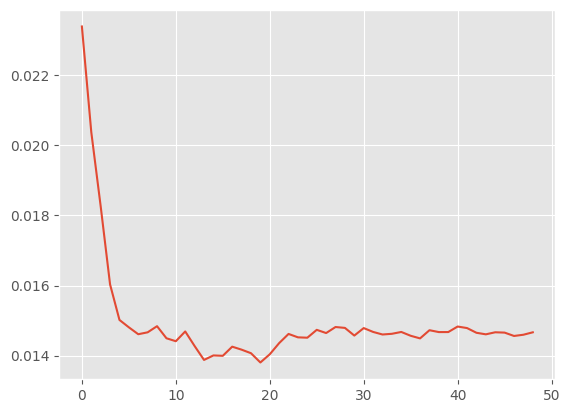

In [28]:
plt.plot(desviaciones)